In [20]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import random
import math
from sklearn.utils import class_weight

In [ ]:
#!ls drive/MyDrive/ColabNotebooks/DSCI471/Project/Project/data/resized/resized

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip3 install opencv-python

In [21]:
img_dir="/Users/iustintoader/Desktop/Drexel 22:23/Spring/DSCI471/Project/data/resized/resized/"
imgs=os.listdir(img_dir)

In [22]:
img_files=[]
for img in imgs:
    if img.split('.')[1]=='jpg':
        if img.split('_')[1]!='Du╠êrer':
            img_files.append(img)

img_files=pd.DataFrame(img_files)
img_files=img_files.rename(columns={img_files.columns[0]: 'file'})
img_files["Label"]=img_files.apply(lambda x: ' '.join(x.file.rpartition('_')[0].split('_')), axis=1)
img_files["Label"]=img_files["Label"].values.astype(str)

In [23]:
img_x=img_files[img_files.file=="Edgar_Degas_629.jpg"]

In [5]:
img_files.Label.values

array(['Gustav Klimt', 'Vincent van Gogh', 'Amedeo Modigliani', ...,
       'Frida Kahlo', 'Vincent van Gogh', 'Andrei Rublev'], dtype=object)

In [6]:
img_files.Label.unique()

array(['Gustav Klimt', 'Vincent van Gogh', 'Amedeo Modigliani',
       'Edgar Degas', 'Joan Miro', 'Titian', 'Leonardo da Vinci',
       'Pierre-Auguste Renoir', 'Salvador Dali', 'Andrei Rublev',
       'Albrecht Dürer', 'Frida Kahlo', 'Mikhail Vrubel',
       'Gustave Courbet', 'Alfred Sisley', 'Sandro Botticelli',
       'Marc Chagall', 'El Greco', 'Pablo Picasso',
       'Henri de Toulouse-Lautrec', 'Henri Matisse', 'Peter Paul Rubens',
       'Rembrandt', 'Paul Klee', 'Francisco Goya', 'Kazimir Malevich',
       'Paul Gauguin', 'Piet Mondrian', 'Jackson Pollock',
       'Pieter Bruegel', 'Paul Cezanne', 'William Turner',
       'Rene Magritte', 'Georges Seurat', 'Michelangelo', 'Diego Rivera',
       'Jan van Eyck', 'Raphael', 'Camille Pissarro', 'Andy Warhol',
       'Vasiliy Kandinskiy', 'Hieronymus Bosch', 'Edvard Munch',
       'Giotto di Bondone', 'Edouard Manet', 'Claude Monet', 'Caravaggio',
       'Henri Rousseau', 'Diego Velazquez', 'Eugene Delacroix'],
      dtype=object

In [95]:
"""def canny_edge_detection(image):
    img_n = cv2.normalize(src=image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    #img_n = cv2.cvtColor(img_n, cv2.COLOR_RGB2GRAY)
    print(img_n)
    #image=image.astype(np.uint8)

    edges = cv2.Canny(img_n, threshold1=0, threshold2=500, apertureSize=3, L2gradient=False)
    plt.imshow(edges)
    plt.show()
    return edges"""

In [24]:
train_datagen=ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255.,
    shear_range=5,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.2
    #preprocessing_function=canny_edge_detection
)
traingen=train_datagen.flow_from_dataframe(img_files, directory=img_dir,
                                           x_col="file",
                                           y_col="Label",
                                           target_size=(256, 256),
                                           batch_size=20,
                                           class_mode='categorical',
                                           subset="training",
                                           shuffle=True)

validgen=train_datagen.flow_from_dataframe(img_files, directory=img_dir,
                                           x_col="file",
                                           y_col="Label",
                                           target_size=(256, 256),
                                           batch_size=20,
                                           class_mode='categorical',
                                           subset="validation",
                                           shuffle=True)

Found 6684 validated image filenames belonging to 50 classes.
Found 1671 validated image filenames belonging to 50 classes.


In [25]:
class_weights=class_weight.compute_class_weight('balanced',
                                               classes=np.unique(traingen.classes),
                                               y=traingen.classes)
class_weights=dict(zip(np.unique(traingen.classes), class_weights))

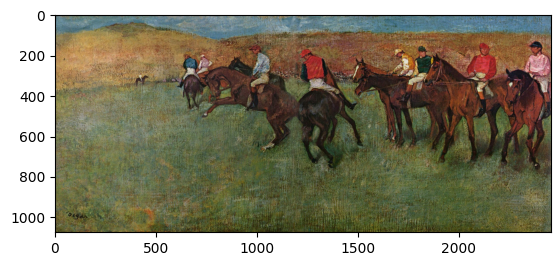

Found 1 validated image filenames belonging to 1 classes.


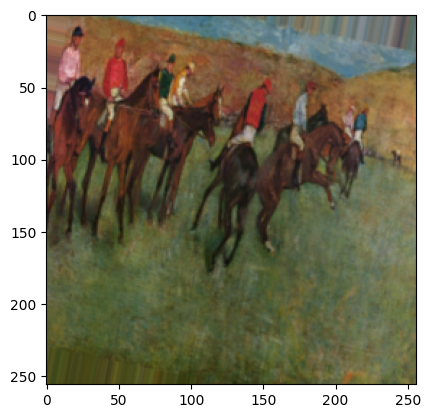

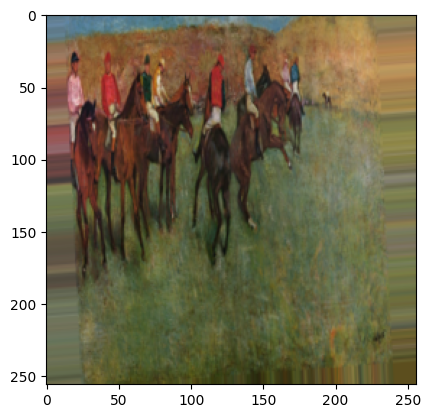

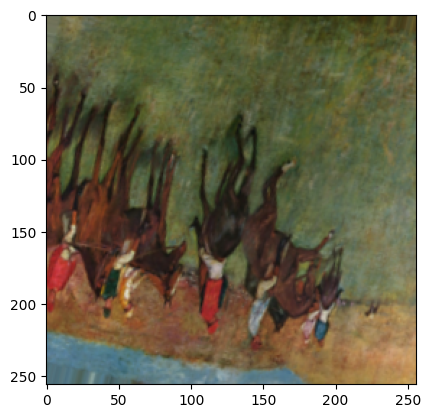

In [101]:
image=plt.imread(img_dir+"Edgar_Degas_629.jpg")
plt.imshow(image)
plt.show()
test=train_datagen.flow_from_dataframe(img_x, directory=img_dir,
                                           x_col="file",
                                           y_col="Label",
                                           target_size=(256, 256),
                                           batch_size=20,
                                           class_mode="categorical",
                                           subset="training",
                                           interpolation="bilinear",
                                           shuffle=True
                                       )
for i in range(3):
  batch=test.next()
  #print(batch[1])
  plt.imshow(batch[0][0])
  plt.show()

In [ ]:
test=train_datagen.flow_from_directory("drive/MyDrive/ColabNotebooks/DSCI471/Project/Project/data/images/images",
                                           target_size=(256, 256),
                                           batch_size=20,
                                           class_mode="categorical",
                                           subset="training",
                                           keep_aspect_ratio=True,
                                           shuffle=True
                                       )
for i in range(5):
  batch=test.next()
  plt.imshow(batch[0][0])
  plt.show()

In [ ]:
y_max=float('-inf')
x_max=float('-inf')
i_x=-1
i_y=-1
for i in range(len(imgs)):
  img=cv2.imread(img_dir+imgs[i])
  y_ax=img.shape[0]
  x_ax=img.shape[1]
  if y_ax>y_max:
    y_max=y_ax
    i_y=i
  if x_ax>x_max:
    x_max=x_ax
    i_x=i

In [ ]:
print(y_max, i_y)
print(x_max, i_x)

In [ ]:
y_max=2296
i_y=1085
x_max=2458
i_x=6631

In [ ]:
print(y_max/4, x_max/4)

In [26]:
n_classes=len(img_files.Label.unique())

In [31]:
model=tf.keras.Sequential()
model.add(layers.Conv2D(32, (1,1), input_shape=(256, 256, 3)))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
model.add(layers.)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 256, 256, 32)      128       
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [50]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (1,1), input_shape=(256, 256, 3)),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Conv2D(64, (1,1), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Conv2D(128, (1,1), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Conv2D(256, (1,1), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Conv2D(512, (1,1), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(1024, activation='tanh'),
    layers.Dense(n_classes, activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 256, 256, 32)      128       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 128, 128, 64)      2112      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 64, 64, 128)       8320      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 32, 32, 128)    

In [51]:
my_optimizer=optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=my_optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy', 'mse']
)

In [52]:
model.fit(traingen, validation_data=validgen, epochs=10,
         class_weight=class_weights)

Epoch 1/10
335/335 [==============================] - 324s 965ms/step - loss: 3.6005 - accuracy: 0.0814 - mse: 0.0192 - val_loss: 3.3345 - val_accuracy: 0.1161 - val_mse: 0.0190
Epoch 2/10
335/335 [==============================] - 314s 936ms/step - loss: 3.0494 - accuracy: 0.1852 - mse: 0.0184 - val_loss: 3.0411 - val_accuracy: 0.1999 - val_mse: 0.0182
Epoch 3/10
335/335 [==============================] - 324s 967ms/step - loss: 2.8169 - accuracy: 0.2377 - mse: 0.0177 - val_loss: 3.0322 - val_accuracy: 0.1867 - val_mse: 0.0182
Epoch 4/10
335/335 [==============================] - 334s 996ms/step - loss: 2.6850 - accuracy: 0.2615 - mse: 0.0174 - val_loss: 2.7937 - val_accuracy: 0.2573 - val_mse: 0.0174
Epoch 5/10
335/335 [==============================] - 329s 983ms/step - loss: 2.5516 - accuracy: 0.2892 - mse: 0.0169 - val_loss: 2.7623 - val_accuracy: 0.2573 - val_mse: 0.0174
Epoch 6/10
335/335 [==============================] - 326s 972ms/step - loss: 2.4430 - accuracy: 0.3185 - mse: